# edsa - buisness2

Goh Si Hui  
October 26, 2024

# Setting the environment

In [ ]:
pacman::p_load(tidyverse, purrr, sf, tmap, sfdep)


# Importing Datasets

## Business data

In [ ]:
business <- read_rds("data/rds/biz.rds")
glimpse(business)


Rows: 570,182
Columns: 4
$ postal_code <chr> "018935", "018935", "018935", "018936", "018936", "018936"…
$ uen         <chr> "201817714D", "201316793Z", "201933792W", "202028573K", "2…
$ latitude    <dbl> 1.277372, 1.277372, 1.277372, 1.277906, 1.277906, 1.277906…
$ longitude   <dbl> 103.8528, 103.8528, 103.8528, 103.8529, 103.8529, 103.8529…

In [ ]:
business_sf <- read_rds("data/rds/biz_sf.rds")
glimpse(business_sf)


Rows: 570,182
Columns: 3
$ postal_code <chr> "018935", "018935", "018935", "018936", "018936", "018936"…
$ uen         <chr> "201817714D", "201316793Z", "201933792W", "202028573K", "2…
$ geometry    <POINT [m]> POINT (30173.11 28870.87), POINT (30173.11 28870.87)…

In [ ]:
st_crs(business_sf)


Coordinate Reference System:
  User input: EPSG:3414 
  wkt:
PROJCRS["SVY21 / Singapore TM",
    BASEGEOGCRS["SVY21",
        DATUM["SVY21",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4757]],
    CONVERSION["Singapore Transverse Mercator",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",1.36666666666667,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",103.833333333333,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",1,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",28001.642,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETE

## Singapore Master Plan 2019 Subzone Boundary

In [ ]:
mpsz <-st_read(dsn = "data/spatial",
               layer = "MPSZ-2019") %>% 
  st_transform(crs = 3414)


Reading layer `MPSZ-2019' from data source 
  `C:\sihuihui\mitbcapstone\notebooks\data\spatial' using driver `ESRI Shapefile'
Simple feature collection with 332 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 103.6057 ymin: 1.158699 xmax: 104.0885 ymax: 1.470775
Geodetic CRS:  WGS 84

In [ ]:
st_crs(mpsz)


Coordinate Reference System:
  User input: EPSG:3414 
  wkt:
PROJCRS["SVY21 / Singapore TM",
    BASEGEOGCRS["SVY21",
        DATUM["SVY21",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4757]],
    CONVERSION["Singapore Transverse Mercator",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",1.36666666666667,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",103.833333333333,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",1,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",28001.642,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETE

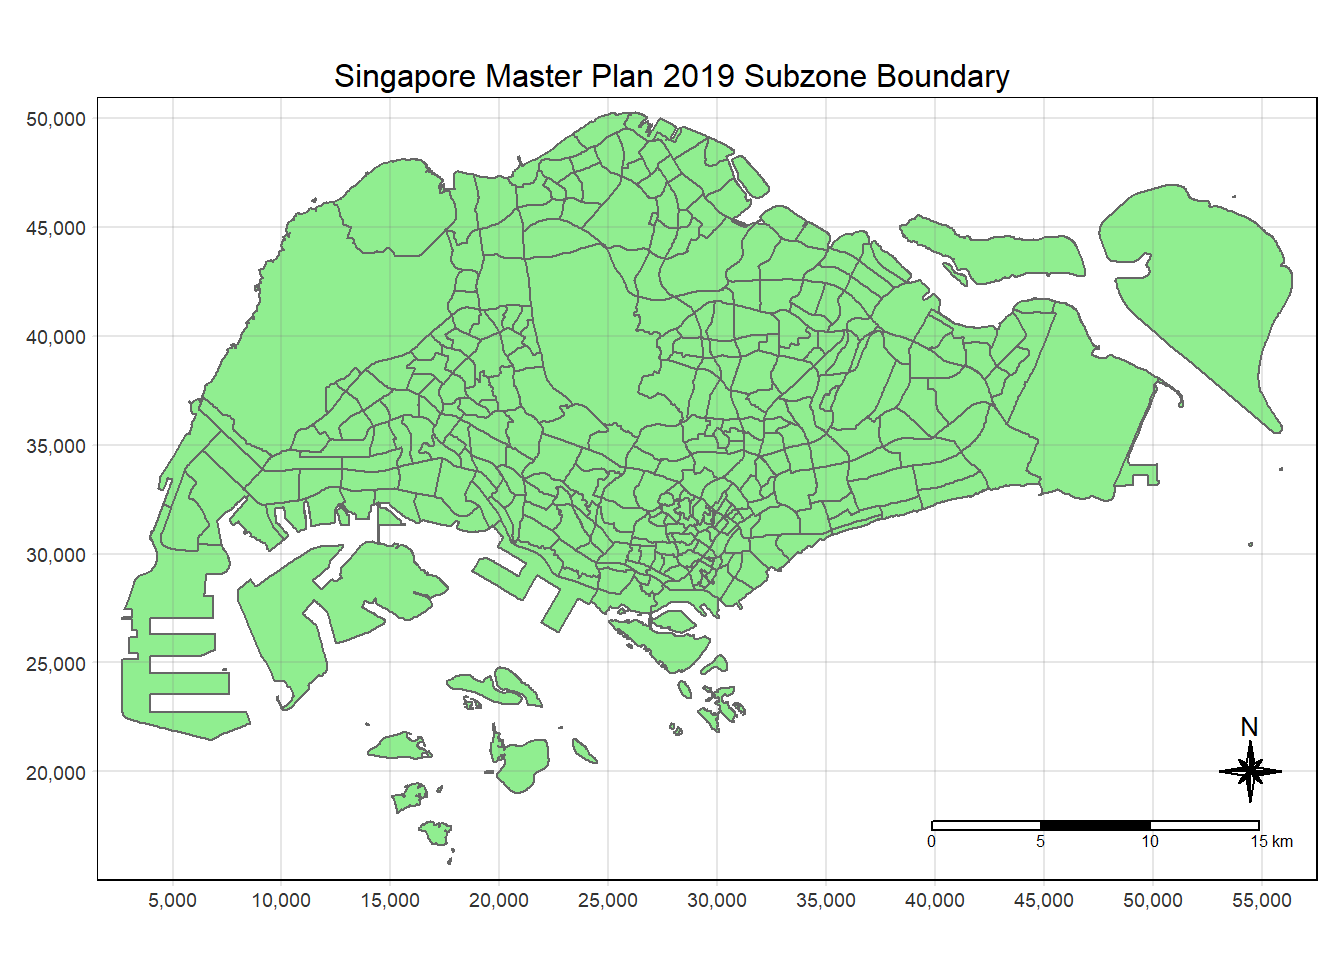

In [ ]:
tmap_options(check.and.fix = TRUE)
tm_shape(mpsz) +
  tm_polygons("lightgreen", title = "Singapore Boundary") +
  tm_layout(main.title = "Singapore Master Plan 2019 Subzone Boundary",
            main.title.position = "center",
            main.title.size = 1.0,
            legend.height = 0.35, 
            legend.width = 0.35,
            frame = TRUE) +
  tm_compass(type="8star", size = 2) +
  tm_scale_bar() +
  tm_grid(alpha = 0.2)


# creating the Hexagon Layer

In [ ]:
hex_layer <- st_make_grid(mpsz,
               cellsize = 400,
               what = "polygon",
               square = FALSE) %>%
  st_sf() 

hex_layer


Simple feature collection with 13685 features and 0 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 2267.538 ymin: 15517.78 xmax: 56667.54 ymax: 50620.68
Projected CRS: SVY21 / Singapore TM
First 10 features:
                         geometry
1  POLYGON ((2467.538 15864.19...
2  POLYGON ((2467.538 16557.01...
3  POLYGON ((2467.538 17249.83...
4  POLYGON ((2467.538 17942.65...
5  POLYGON ((2467.538 18635.47...
6  POLYGON ((2467.538 19328.29...
7  POLYGON ((2467.538 20021.11...
8  POLYGON ((2467.538 20713.93...
9  POLYGON ((2467.538 21406.75...
10 POLYGON ((2467.538 22099.57...

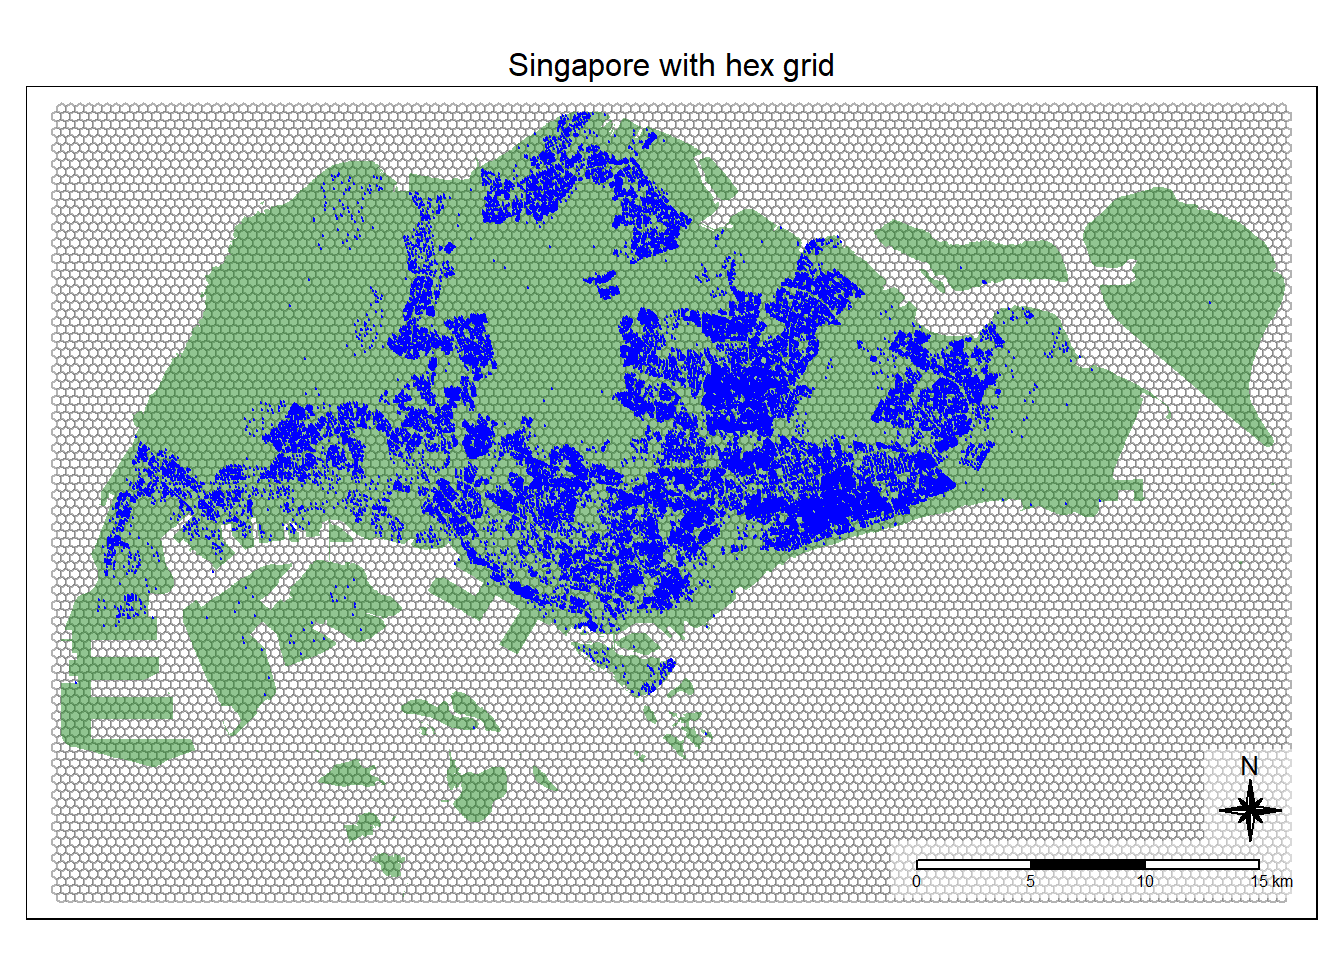

In [ ]:
tm_shape(hex_layer) +
  tm_fill(col = "white", title = "Hexagons") +
  tm_borders(alpha = 0.5) +
  tm_layout(main.title = "Singapore with hex grid",
            main.title.position = "center",
            main.title.size = 1.0,
            legend.height = 0.35, 
            legend.width = 0.35,
            frame = TRUE) +
  tm_compass(type="8star", size = 2, bg.color = "white", bg.alpha = 0.5) +
  tm_scale_bar(bg.color = "white", bg.alpha = 0.5) +
  tm_shape(mpsz) +
  tm_fill("forestgreen", title = "Singapore Boundary", alpha = 0.5) +
  tm_shape(business_sf) +
  tm_dots(col = "blue", size = 0.005, title = "Business")


## Giving each hexagon an ID

In [ ]:
hex_layer$HEX_ID <- sprintf("H%04d", seq_len(nrow(hex_layer))) %>% as.factor()
head(hex_layer)


Simple feature collection with 6 features and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 2267.538 ymin: 15864.19 xmax: 2667.538 ymax: 19790.17
Projected CRS: SVY21 / Singapore TM
                        geometry HEX_ID
1 POLYGON ((2467.538 15864.19...  H0001
2 POLYGON ((2467.538 16557.01...  H0002
3 POLYGON ((2467.538 17249.83...  H0003
4 POLYGON ((2467.538 17942.65...  H0004
5 POLYGON ((2467.538 18635.47...  H0005
6 POLYGON ((2467.538 19328.29...  H0006

## Number of businesses in each hexagon

In [ ]:
hex_layer$`BIZ_COUNT`<- lengths(st_intersects(hex_layer, business_sf))


## Hexagons only with businesses

In [ ]:
biz_hex <- filter(hex_layer, BIZ_COUNT >0)
biz_hex


Simple feature collection with 2709 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 3067.538 ymin: 22792.39 xmax: 53467.54 ymax: 50274.27
Projected CRS: SVY21 / Singapore TM
First 10 features:
                         geometry HEX_ID BIZ_COUNT
1  POLYGON ((3267.538 24870.86...  H0216        33
2  POLYGON ((4267.538 27988.55...  H0473         1
3  POLYGON ((4267.538 28681.37...  H0474         9
4  POLYGON ((4467.538 28334.96...  H0524         4
5  POLYGON ((4467.538 29720.6,...  H0526       108
6  POLYGON ((4467.538 30413.42...  H0527        12
7  POLYGON ((4667.538 27295.73...  H0573         6
8  POLYGON ((4667.538 30067.01...  H0577       106
9  POLYGON ((4667.538 30759.83...  H0578        19
10 POLYGON ((4667.538 31452.65...  H0579         2

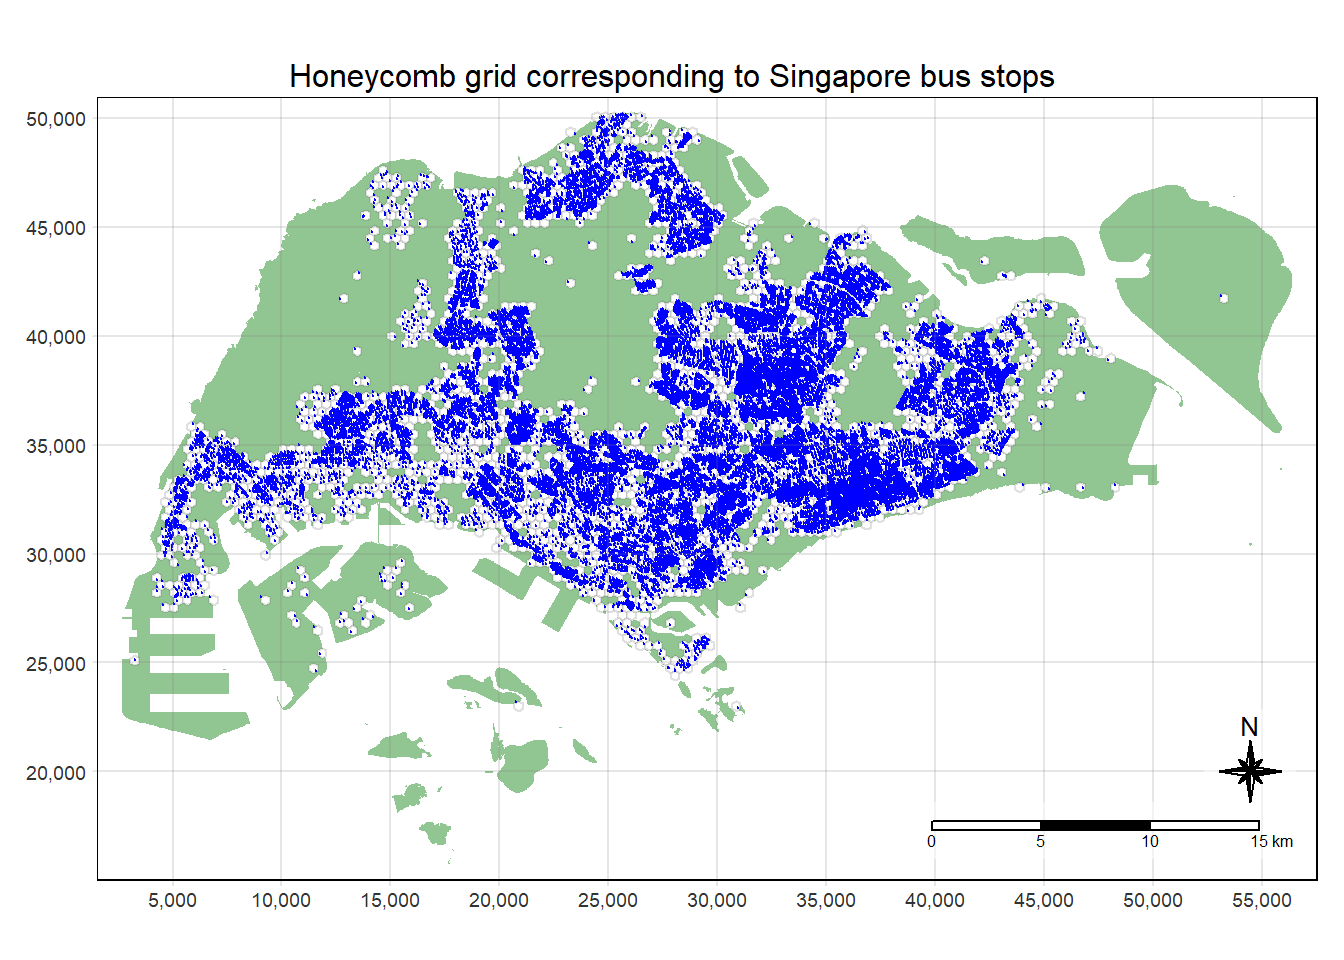

In [ ]:
tm_shape(mpsz) +
  tm_fill("forestgreen", title = "Singapore Boundary", alpha = 0.5) +
  tm_shape(biz_hex) +
  tm_fill(col = "white", title = "Hexagons", alpha = 1) +
  tm_borders(alpha = 0.2) +
  tm_layout(main.title = "Honeycomb grid corresponding to Singapore bus stops",
            main.title.position = "center",
            main.title.size = 1.0,
            legend.height = 0.35, 
            legend.width = 0.35,
            frame = TRUE) +
  tm_compass(type="8star", size = 2, bg.color = "white", bg.alpha = 0.5) +
  tm_scale_bar(bg.color = "white", bg.alpha = 0.5) +
  tm_shape(business_sf) +
  tm_dots(col = "blue", size = 0.001, title = "Bus Stops") +
  tm_grid(alpha = 0.2)


# Is there any signs of spatial clustering?

In [ ]:
knn6_nb <- biz_hex %>% st_centroid() %>% st_knn(k=6)


[[1]]
[1]  2  7 18 19 26 39

[[2]]
[1]  3  4  7 12 19 27

[[3]]
[1]  2  4 12 19 20 27

In [ ]:
biz_knn6 <- biz_hex %>%
  mutate(
    nb = knn6_nb,
    wt = st_inverse_distance(nb, geometry,
                             scale = 1,
                             alpha = 1)
  )


! Polygon provided. Using point on surface.

## Global Measure of Spatial Autocorrelation

In [ ]:
global_moran_perm(
  biz_knn6$BIZ_COUNT,
  biz_knn6$nb,
  biz_knn6$wt,
  nsim = 99
)



    Monte-Carlo simulation of Moran I

data:  x 
weights: listw  
number of simulations + 1: 100 

statistic = 0.48945, observed rank = 100, p-value < 2.2e-16
alternative hypothesis: two.sided

I is 0.48945, which is more than 0, showing signs of clustering

## Local Measure of Spatial Autocorrelation

### Calculating Local Moran’s I

In [ ]:
lmi_biz <- biz_knn6 %>% 
  mutate(local_moran = local_moran(
    BIZ_COUNT, nb, wt, nsim = 99),
         .before = 1) %>%
  unnest(local_moran)


### Plotting Local Moran’s I and p-value

Variable(s) "ii" contains positive and negative values, so midpoint is set to 0. Set midpoint = NA to show the full spectrum of the color palette.

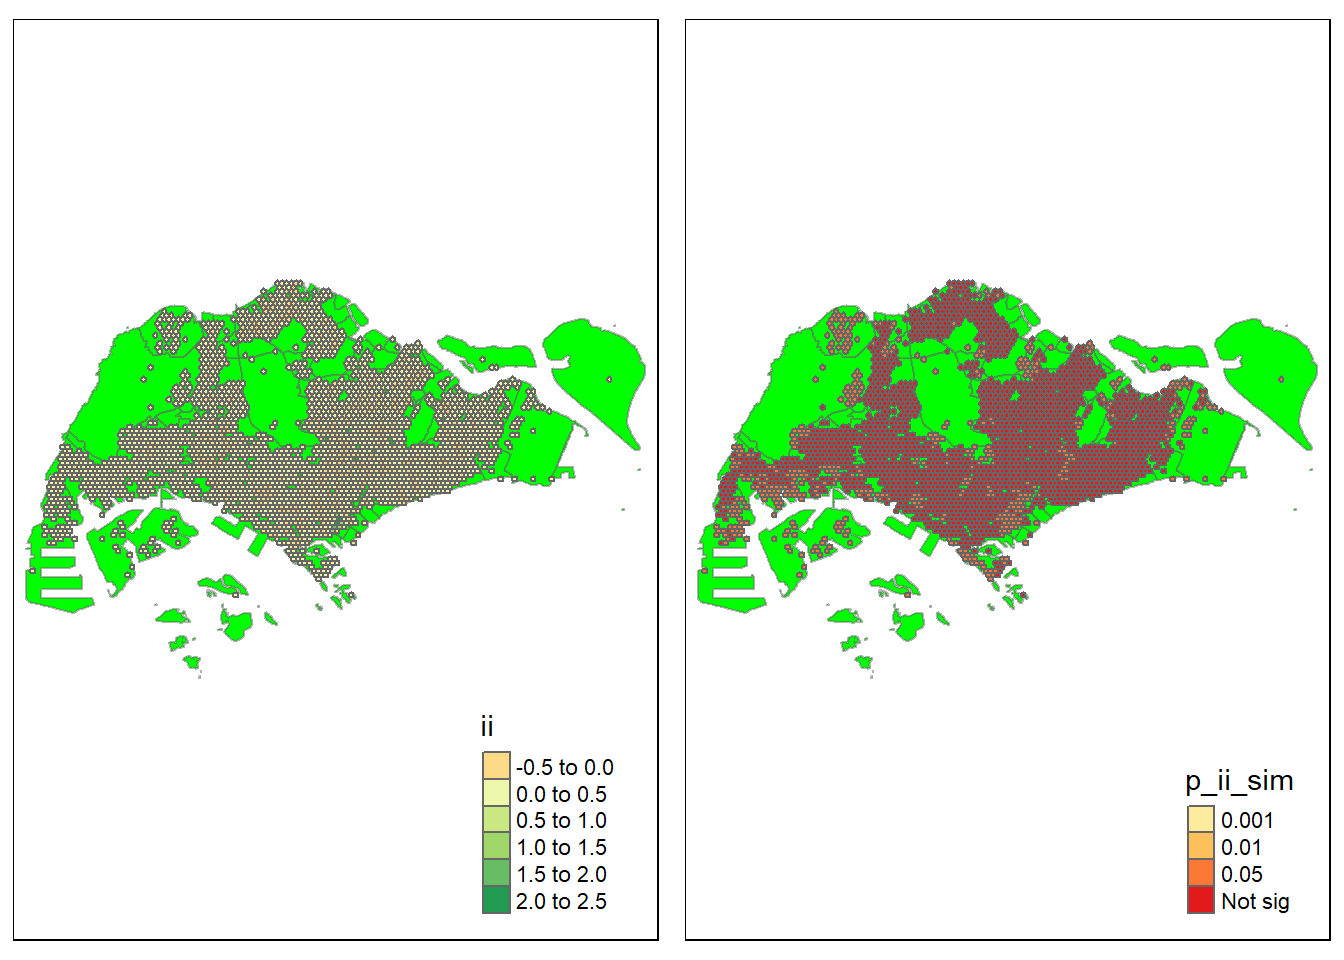

In [ ]:
 tmap_arrange(
    tm_shape(mpsz) +
      tm_fill(col="green") +
      tm_borders(alpha = 0.5) +
      tm_shape(lmi_biz) +
      tm_polygons("ii"),
    tm_shape(mpsz) +
      tm_fill(col="green") +
      tm_borders(alpha = 0.5) +
      tm_shape(lmi_biz) +
      tm_polygons("p_ii_sim",
              breaks = c(0, 0.001, 0.01, 0.05, 1),
              labels = c("0.001", "0.01", "0.05", "Not sig"),
              palette = "YlOrRd"
              ),
    ncol = 2
  )


### Plotting LISA Map

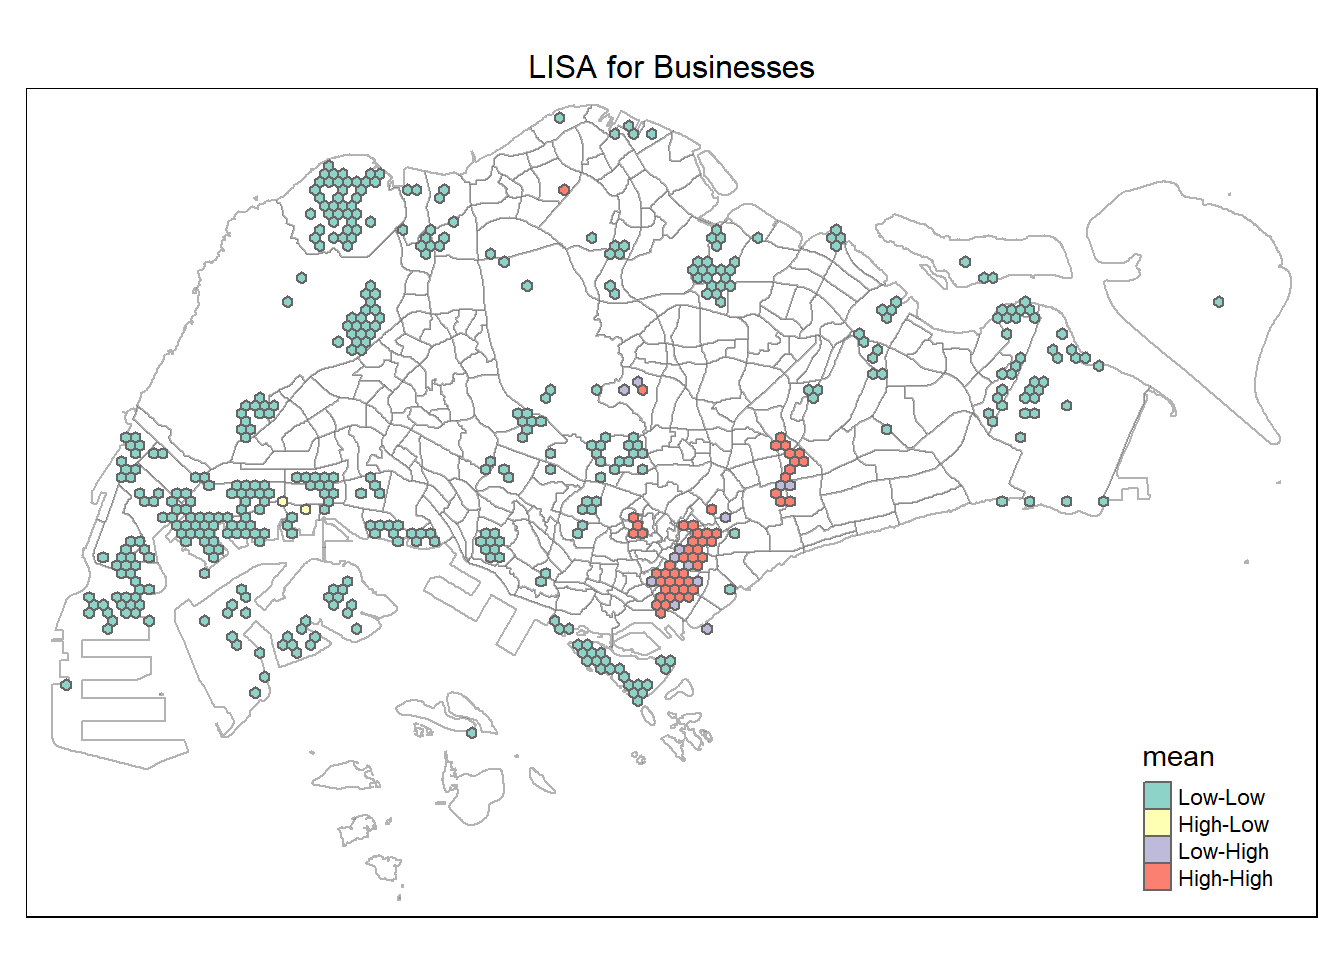

In [ ]:
tm_shape(mpsz) +
  tm_fill(col="white")+
  tm_borders(alpha = 0.5) +
  tm_shape(lmi_biz %>% filter(p_ii_sim < 0.05)) +
  tm_polygons("mean") + 
  tm_layout(
    main.title = "LISA for Businesses",
    main.title.position = "center",
    main.title.size = 1
  )
